In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [3]:
df=pd.read_csv('/Users/ambreservaege/Downloads/donnees_macro.csv')
df.head()

,Date,PIB,Taux_interet,Inflation
0,2000-03-31,1010.993428,4.584049,1.031767
1,2000-06-30,1020.716900,1.621815,2.639936
2,2000-09-30,1032.012277,2.346723,3.268889
3,2000-12-31,1045.058336,3.899980,2.220803
4,2001-03-31,1054.590030,1.529592,2.118602


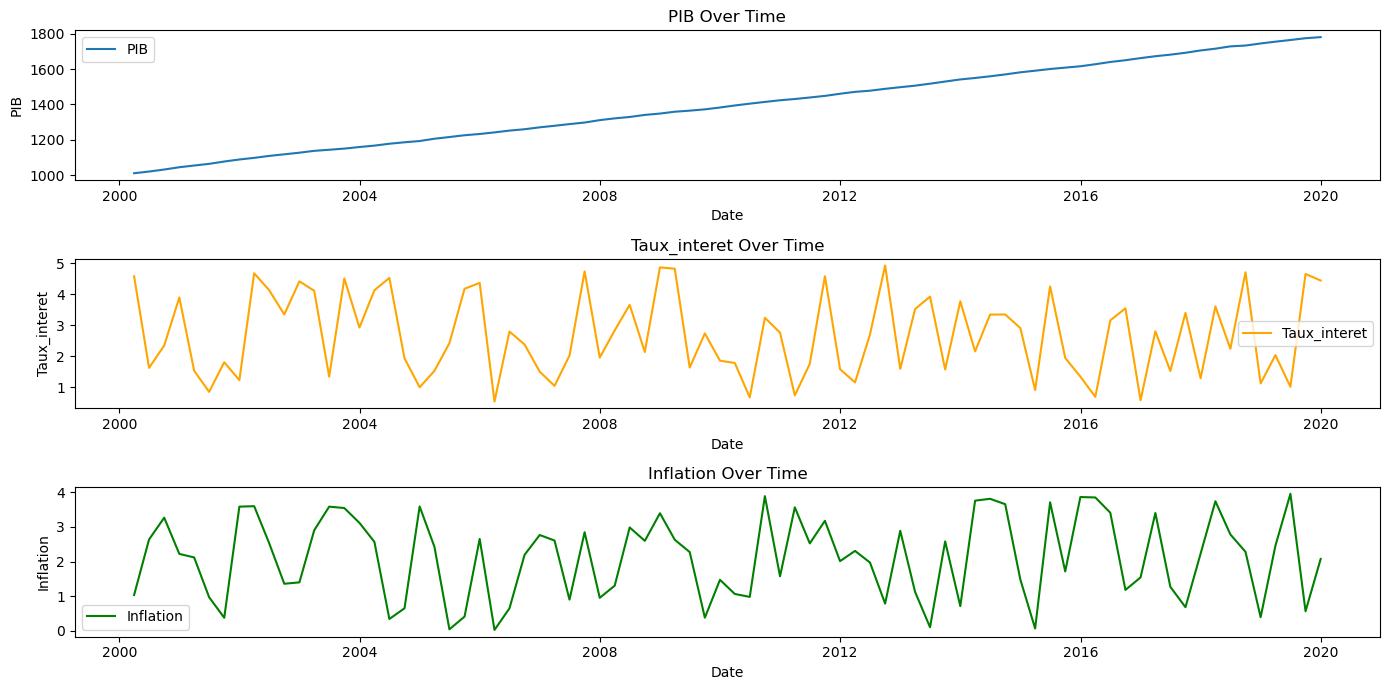

In [4]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))

# Plot PIB
plt.subplot(3, 1, 1)
plt.plot(df.index, df['PIB'], label='PIB')
plt.title('PIB Over Time')
plt.xlabel('Date')
plt.ylabel('PIB')
plt.legend()

# Plot Taux_interet
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Taux_interet'], label='Taux_interet', color='orange')
plt.title('Taux_interet Over Time')
plt.xlabel('Date')
plt.ylabel('Taux_interet')
plt.legend()

# Plot Inflation
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Inflation'], label='Inflation', color='green')
plt.title('Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Perform ADF test for each series
adf_test(df['PIB'], 'PIB')
adf_test(df['Taux_interet'], 'Taux_interet')
adf_test(df['Inflation'], 'Inflation')

Augmented Dickey-Fuller Test: PIB
ADF Test Statistic              2.877901
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656

Augmented Dickey-Fuller Test: Taux_interet
ADF Test Statistic            -9.207458e+00
p-value                        1.927633e-15
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00

Augmented Dickey-Fuller Test: Inflation
ADF Test Statistic            -8.007645e+00
p-value                        2.245202e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)  

In [6]:
# Function to apply differencing and perform ADF test
def adf_test_with_diff(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    if p_value > 0.05:
        print(f'{title} is not stationary. Applying differencing...')
        series_diff = series.diff().dropna()
        result_diff = adfuller(series_diff, autolag='AIC')
        print(f'Augmented Dickey-Fuller Test after differencing: {title}')
        labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
        out = pd.Series(result_diff[0:4], index=labels)
        for key, value in result_diff[4].items():
            out[f'Critical Value ({key})'] = value
        print(out.to_string())
        print('')
    else:
        print(f'{title} is stationary.')
        labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
        out = pd.Series(result[0:4], index=labels)
        for key, value in result[4].items():
            out[f'Critical Value ({key})'] = value
        print(out.to_string())
        print('')

# Perform ADF test with differencing for each series
adf_test_with_diff(df['PIB'], 'PIB')
adf_test_with_diff(df['Taux_interet'], 'Taux_interet')
adf_test_with_diff(df['Inflation'], 'Inflation')

PIB is not stationary. Applying differencing...
Augmented Dickey-Fuller Test after differencing: PIB
ADF Test Statistic            -8.763330e+00
p-value                        2.637898e-14
#Lags Used                     0.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00

Taux_interet is stationary.
ADF Test Statistic            -9.207458e+00
p-value                        1.927633e-15
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00

Inflation is stationary.
ADF Test Statistic            -8.007645e+00
p-value                        2.245202e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical

In [7]:
# Interpréter les résultats des tests ADF pour déterminer l'ordre d'intégration I(d)
def interpret_adf_results(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    if p_value > 0.05:
        print(f'{title} is not stationary. Applying first differencing...')
        series_diff = series.diff().dropna()
        result_diff = adfuller(series_diff, autolag='AIC')
        p_value_diff = result_diff[1]
        if p_value_diff > 0.05:
            print(f'{title} is not stationary after first differencing. Applying second differencing...')
            series_diff2 = series_diff.diff().dropna()
            result_diff2 = adfuller(series_diff2, autolag='AIC')
            p_value_diff2 = result_diff2[1]
            if p_value_diff2 > 0.05:
                print(f'{title} is not stationary after second differencing. Order of integration is higher than 2.')
            else:
                print(f'{title} is stationary after second differencing. Order of integration is I(2).')
        else:
            print(f'{title} is stationary after first differencing. Order of integration is I(1).')
    else:
        print(f'{title} is stationary. Order of integration is I(0).')

# Interpréter les résultats pour chaque série
interpret_adf_results(df['PIB'], 'PIB')
interpret_adf_results(df['Taux_interet'], 'Taux_interet')
interpret_adf_results(df['Inflation'], 'Inflation')

PIB is not stationary. Applying first differencing...
PIB is stationary after first differencing. Order of integration is I(1).
Taux_interet is stationary. Order of integration is I(0).
Inflation is stationary. Order of integration is I(0).


In [8]:
from statsmodels.tsa.api import VAR

# Fit the VAR model
model = VAR(df)

# Select the optimal number of lags using AIC and BIC
lag_order_aic = model.select_order(maxlags=10).aic
lag_order_bic = model.select_order(maxlags=10).bic

print(f'Optimal number of lags according to AIC: {lag_order_aic}')
print(f'Optimal number of lags according to BIC: {lag_order_bic}')

Optimal number of lags according to AIC: 1
Optimal number of lags according to BIC: 1


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [9]:
# Estimer le modèle VAR avec le nombre de retards optimal selon AIC
var_model_aic = model.fit(lag_order_aic)
print(var_model_aic.summary())

# Estimer le modèle VAR avec le nombre de retards optimal selon BIC
var_model_bic = model.fit(lag_order_bic)
print(var_model_bic.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Mar, 2025
Time:                     11:34:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    2.72655
Nobs:                     79.0000    HQIC:                   2.51083
Log likelihood:          -417.770    FPE:                    10.6642
AIC:                      2.36663    Det(Omega_mle):         9.19551
--------------------------------------------------------------------
Results for equation PIB
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   9.291534         1.551928            5.987           0.000
L1.PIB                  1.000275         0.001006          994.211           0.000
L1.Taux_interet        -0.065373         0.167071     

In [12]:
# Vérifier la stabilité du modèle VAR estimé avec le nombre de retards optimal selon AIC
print("Stabilité du modèle VAR (AIC):", var_model_aic.is_stable())

# Vérifier la stabilité du modèle VAR estimé avec le nombre de retards optimal selon BIC
print("Stabilité du modèle VAR (BIC):", var_model_bic.is_stable())

# Tester l'autocorrélation des résidus pour le modèle VAR (AIC)
print("\nTest d'autocorrélation des résidus pour le modèle VAR (AIC):")
print(var_model_aic.test_whiteness(nlags=12))

# Tester l'autocorrélation des résidus pour le modèle VAR (BIC)
print("\nTest d'autocorrélation des résidus pour le modèle VAR (BIC):")
print(var_model_bic.test_whiteness(nlags=12))

Stabilité du modèle VAR (AIC): False
Stabilité du modèle VAR (BIC): False

Test d'autocorrélation des résidus pour le modèle VAR (AIC):
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: fail to reject at 5% significance level. Test statistic: 87.541, critical value: 123.225>, p-value: 0.788>

Test d'autocorrélation des résidus pour le modèle VAR (BIC):
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: fail to reject at 5% significance level. Test statistic: 87.541, critical value: 123.225>, p-value: 0.788>
